# **Exploratory Analysis of Iris Dataset**

**Author:** Aanandya Mittal  
**Date:** 2/1/2024

## Purpose

The Iris Dataset is a dataset collected by Ronald Fisher in 1936. This dataset has now been used for statistical analysis projects. This project is meant to hone our skill for performing exploratory data analysis and presenting data stories using Jupyter.  

Overall this analysis will investigate the differences between Sepal measurements and Petal measurements in Iris flowers, as well as how these differences are correlated across Iris species. The Sepal is the outer component of the flower and the petal is the colorful component of the flower.

### **Importing libraries**

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Loading the Iris dataset**

This dataset has 5 variables:  
* sepal length
* sepal width
* petal length
* petal width
* species.

In [118]:
df = sns.load_dataset('iris')
print(df.head(10))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa


### **Inspecting the Iris dataset**

This dataset has 4 variables that are float and one variable that is an object.

In [113]:
print(df.shape)
print(df.dtypes)

(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


### **Creating Summary Statistics**

There is an equal quantity of data for each variable. Sepal dimensions appear larger on average than petal dimensions.

In [114]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### **Inspecting Petal Length Column**

Petal length appears to be 1.5-1.6cm most commonly, and distributed normally between 3-7cm with 4.5 cm and 5.2 cm being the second most common heights. Interestingly, there is a gap of zero petals being a length between around 2-3cm.

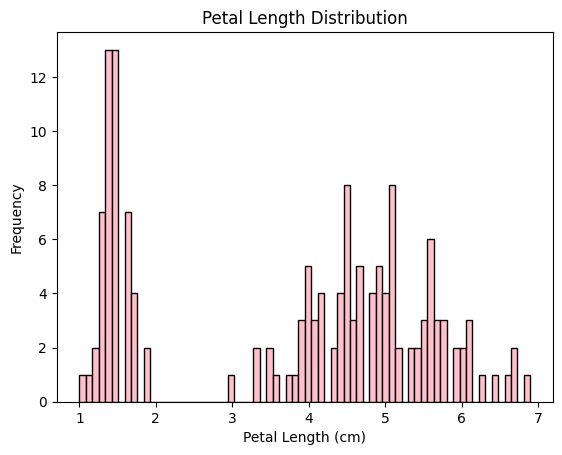

In [115]:
# Inspect histogram by numerical column
plt.hist(df['petal_length'], bins=70, color='pink', edgecolor='black')

# Customize the plot
plt.title('Petal Length Distribution')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')

plt.show()


### **Inspecting and Comparing all Columns**

The Sepal length and width distribution appears to be more normal than the petal distribution. Sepal length and width appear to follow a similar trend as do petal length and width. Petal width has a similar gap to petal length.

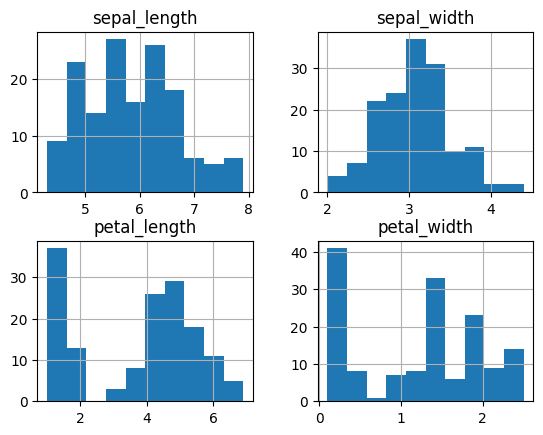

In [116]:
# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

### **Analyzing Species Count**

There are 3 species:
* setosa
* versicolor
* virginica

Each species is represented in an equal quantity in the dataset.

In [117]:
# Inspect value counts by categorical column
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

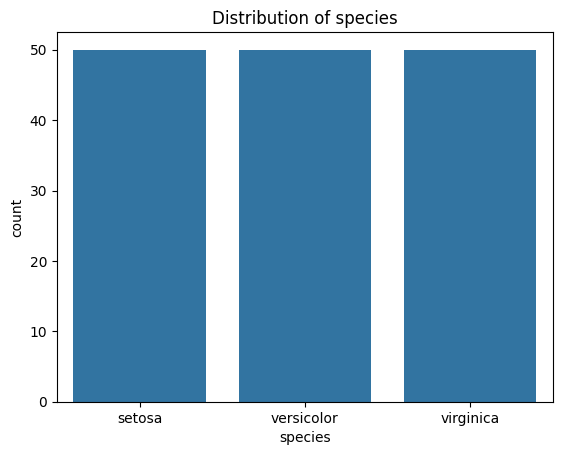

In [62]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

### **Performing Data Transformations**

All columns are renamed with the correct capitalization and specificity.

In [63]:
# Renaming a column
df.rename(columns={'sepal_length': 'Iris Sepal Length',
                   'sepal_width': 'Iris Sepal Width',
                   'petal_length': 'Iris Petal Length',
                   'petal_width': 'Iris Petal Width',
                   'species': 'Iris Species'}, inplace=True)
print(df.columns)

Index(['Iris Sepal Length', 'Iris Sepal Width', 'Iris Petal Length',
       'Iris Petal Width', 'Iris Species'],
      dtype='object')


Adding new columns for more information.

In [99]:
# Adding new columns
df['Sepal Area'] = df['Iris Sepal Length'] * df['Iris Sepal Width']
df['Petal Area'] = df['Iris Petal Length'] * df['Iris Petal Width']
df['Length Difference'] = df['Iris Sepal Length'] - df['Iris Petal Length']
df['Width Difference'] = df['Iris Sepal Width'] - df['Iris Petal Width']
df['Area Difference'] = df['Sepal Area'] - df['Petal Area']

print(df.columns)

Index(['Iris Sepal Length', 'Iris Sepal Width', 'Iris Petal Length',
       'Iris Petal Width', 'Iris Species', 'Sepal Area', 'Petal Area',
       'Length Difference', 'Width Difference', 'Area Difference'],
      dtype='object')


**Updated Dataset:**

In [100]:
print(df.head(10))

   Iris Sepal Length  Iris Sepal Width  Iris Petal Length  Iris Petal Width  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  Iris Species  Sepal Area  Petal Area  Length Difference  Width Difference  \
0       setosa       17.85        0.28             

There is an average difference of 2.09 cm between sepal and petal length, and an average difference of 1.85 cm between Sepal and petal width. There is an average difference of 12.02 cm between sepal and petal area.

In [103]:
print(df.describe())

       Iris Sepal Length  Iris Sepal Width  Iris Petal Length  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       Iris Petal Width  Sepal Area  Petal Area  Length Difference  \
count        150.000000  150.000000  150.000000         150.000000   
mean           1.199333   17.822867    5.794067           2.085333   
std            0.762238    3.361854    4.712390           1.119527   
min            0.100000   10.000000    0.110000           0.300000   
25%            0.300000   15.660000    0.420000           1.2000

### **Visualizing Data**

The correlation for sepal length and width is -0.12. The correlation for petal length and width is 0.96. This shows that overall there is a *low* correlation between the sepal width and length across species, but there is an extremely *high* correlation between petal width and length.

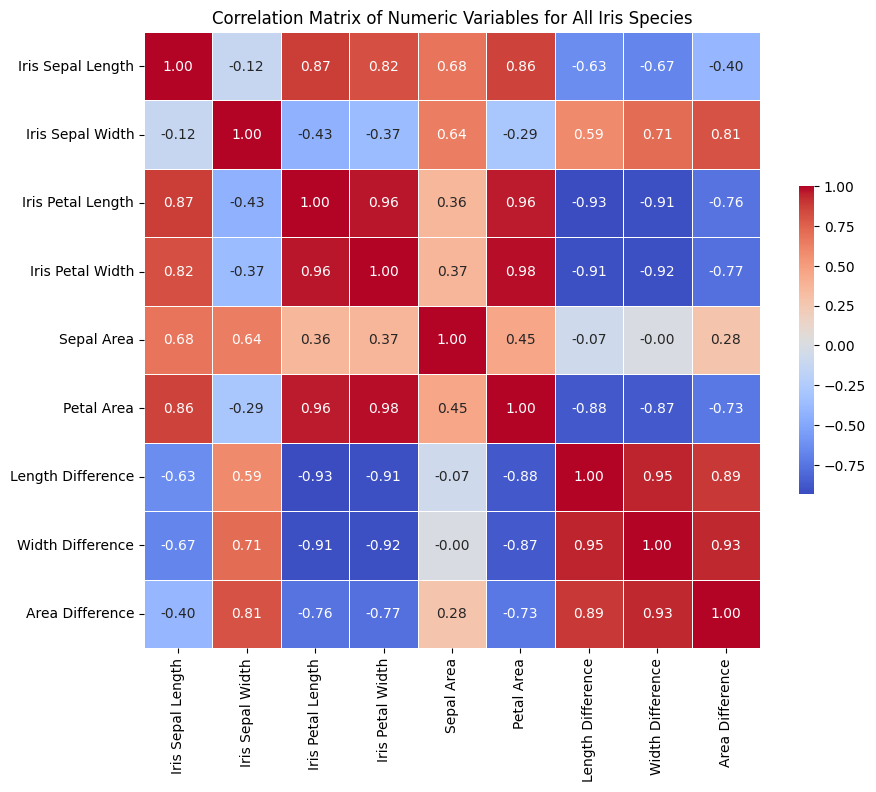

In [104]:
# Select only the numeric columns for the correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Variables for All Iris Species')
plt.show()

To investigate whether this trend is visible when looking at the species individually, this figure has been generated. This figure demonstrates all the correlations for different species for different combinations of variables. However, this data is a little overwhelming to analyze so splitting the correlation up by species will allow us to have more insight.

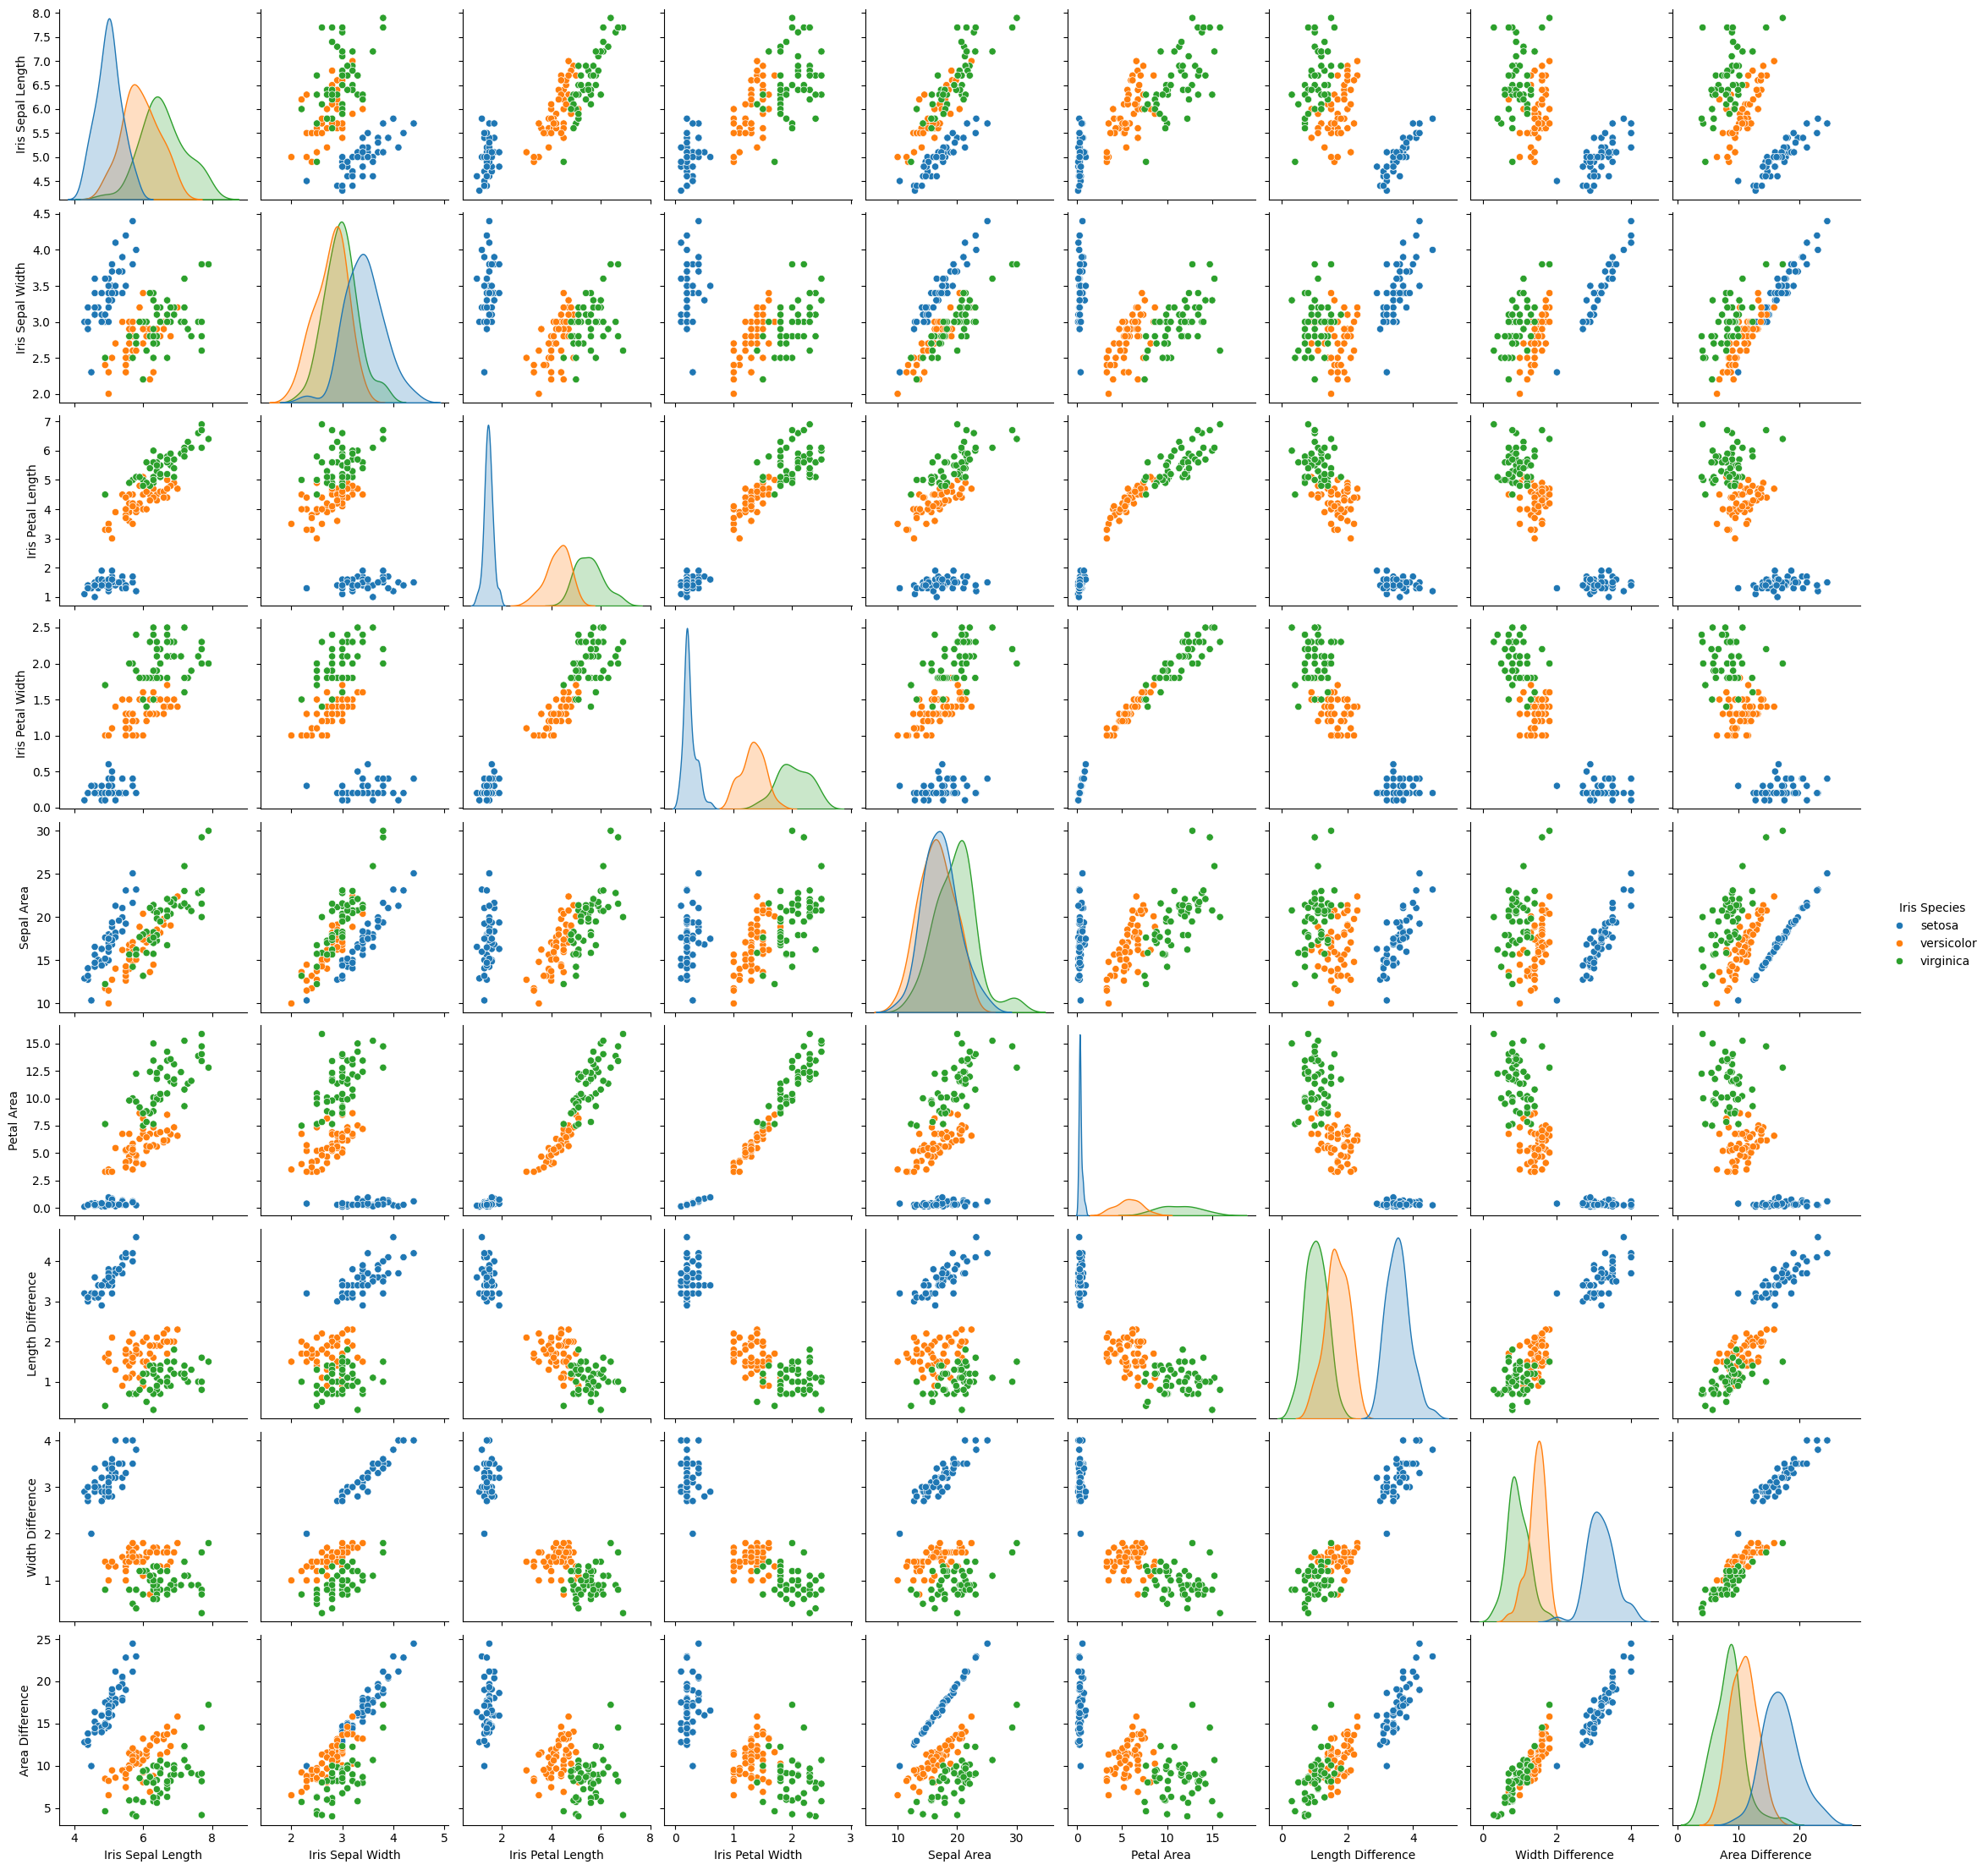

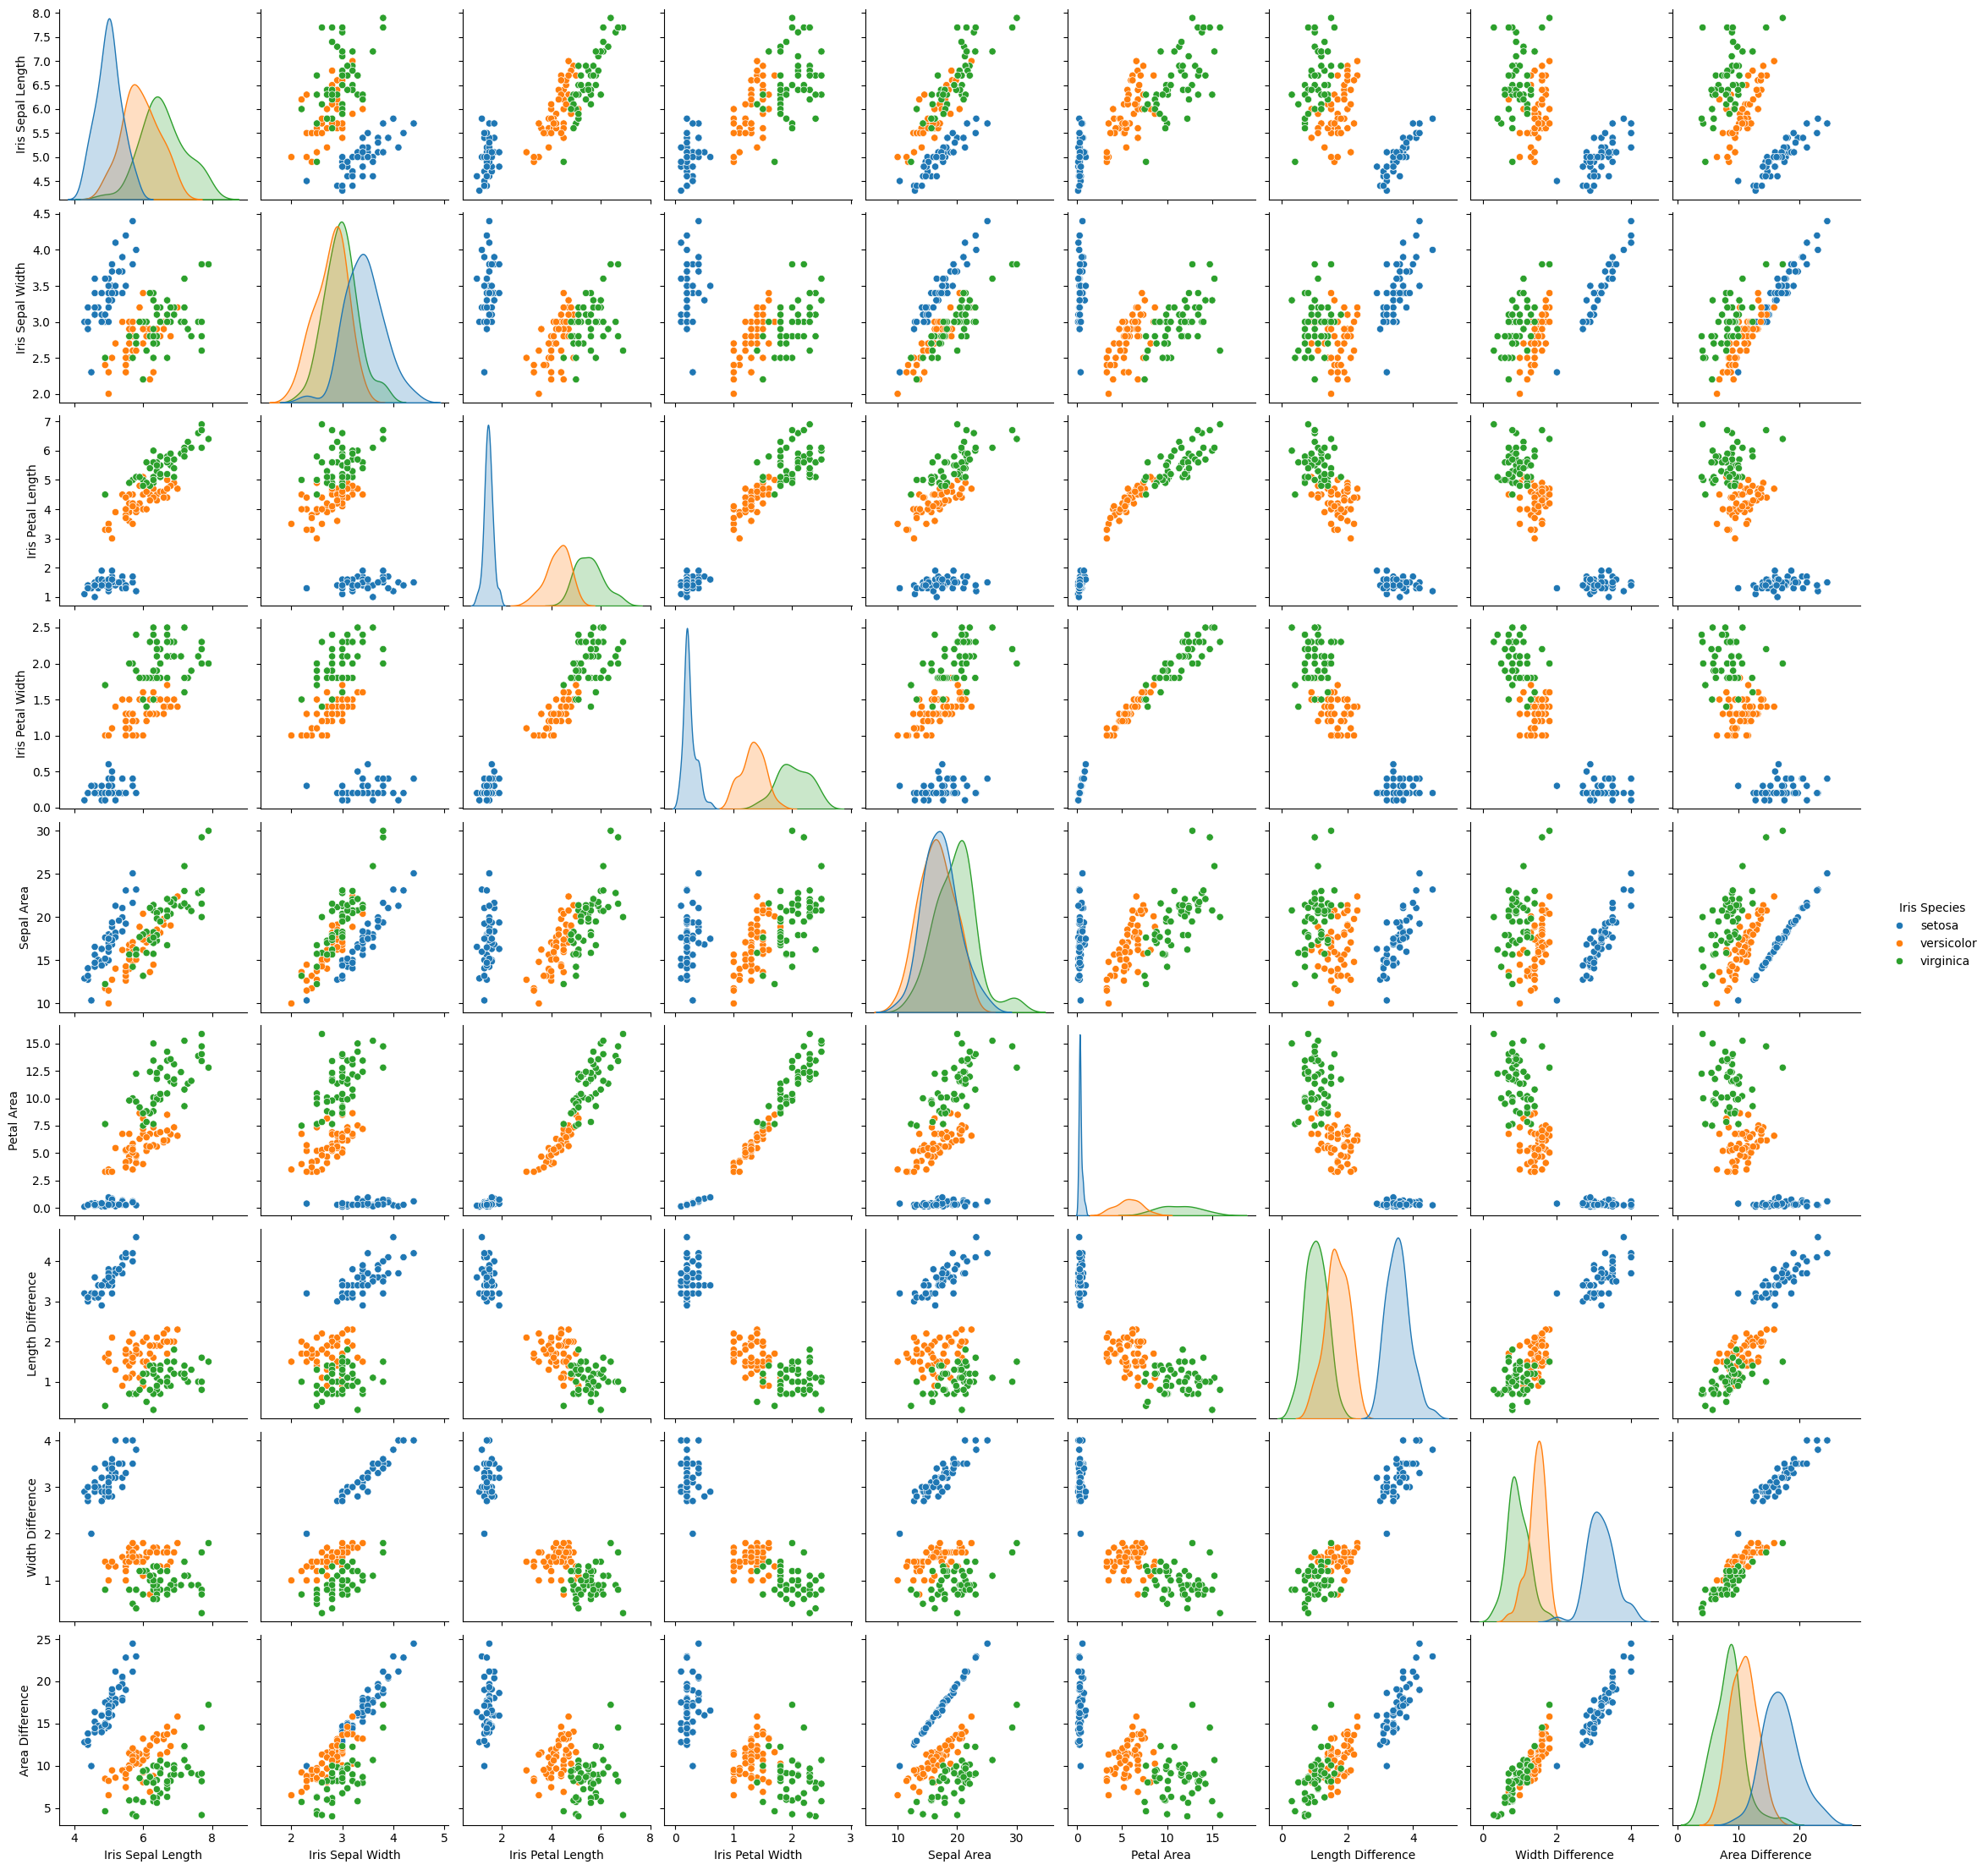

In [105]:
# Generate a pairplot
sns.pairplot(df, hue='Iris Species')
pairplot_fig = sns.pairplot(df, hue='Iris Species')
plt.show()

#### **Setosa Correlation Analysis**

Setosa correlation for sepal length and width is 0.74. Setosa correlation for petal length and width is 0.33. This shows that there is *high* correlation between the sepal width and length for setosa, but there is a *low* correlation between petal width and length. This is intriguing because it's the opposite of what we saw for the correlation overall with all species combined.

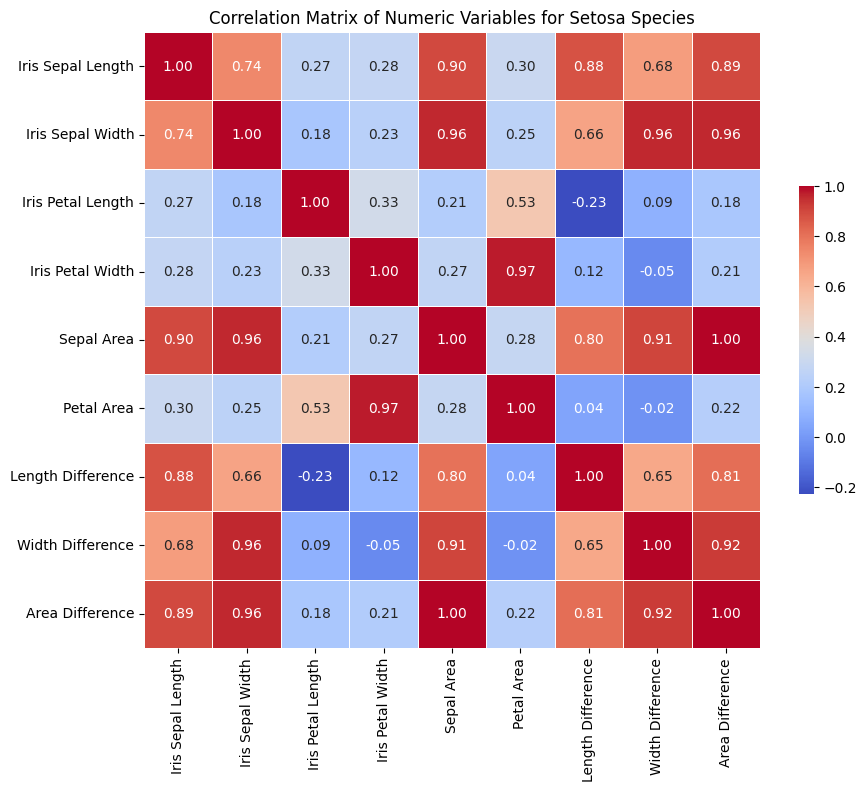

In [107]:
# Filter the DataFrame for 'setosa' species
setosa_df = df[df['Iris Species'] == 'setosa']
numeric_setosa_df = setosa_df.select_dtypes(include=[float, int])
corr_setosa = numeric_setosa_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
sns.heatmap(corr_setosa, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Variables for Setosa Species')
plt.show()

#### **Versicolor Correlation Analysis**

Versicolor correlation for sepal length and width is 0.53. Versicolor correlation for petal length and width is 0.79. This shows that there is *low* correlation between the sepal width and length for versicolor, but there is a *high* correlation between petal width and length. This is more similar to the correlation trend we saw overall with all species combined.

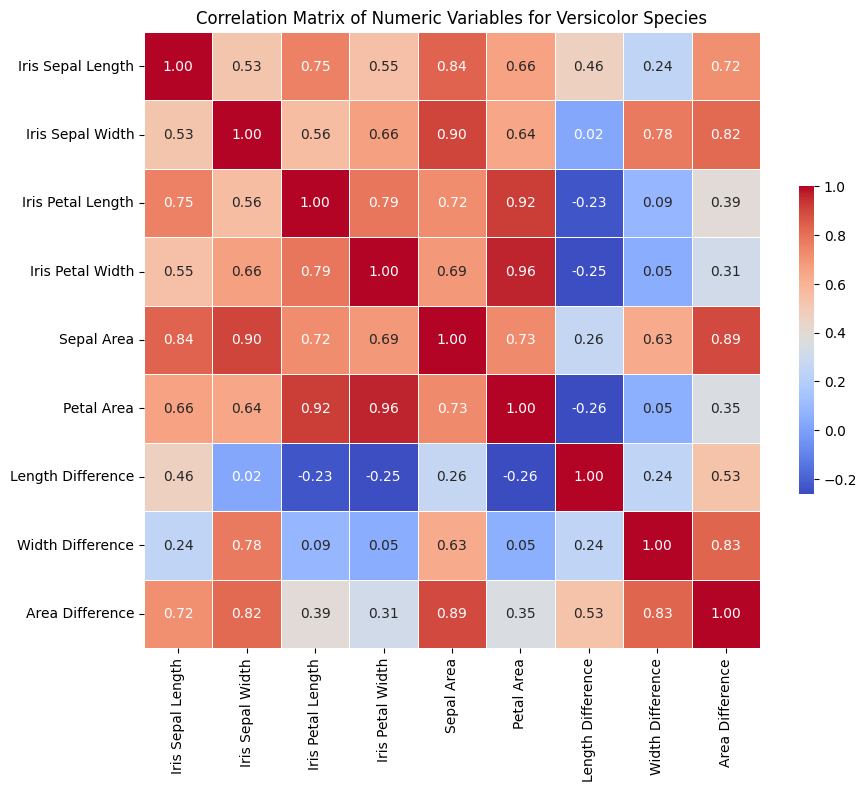

In [108]:
# Filter the DataFrame for 'versicolor' species
versicolor_df = df[df['Iris Species'] == 'versicolor']
numeric_versicolor_df = versicolor_df.select_dtypes(include=[float, int])
corr_versicolor = numeric_versicolor_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
sns.heatmap(corr_versicolor, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Variables for Versicolor Species')
plt.show()

#### **Virgina Correlation Analysis**

Virgina correlation for sepal length and width is 0.46. Versicolor correlation for petal length and width is 0.32. This shows that there is a *moderate* correlation between the sepal width and length for setosa, but there is a *low* correlation between petal width and length. This is fairly different from what we saw overall for the correlation with all species combined.

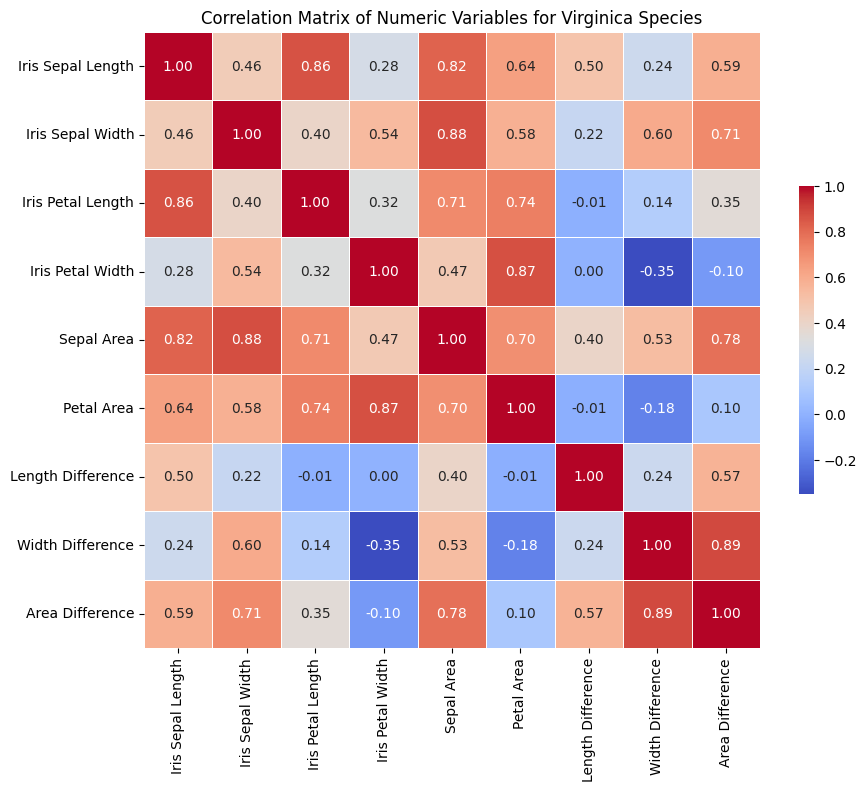

In [109]:
# Filter the DataFrame for 'virginica' species
virginica_df = df[df['Iris Species'] == 'virginica']
numeric_virginica_df = virginica_df.select_dtypes(include=[float, int])
corr_virginica = numeric_virginica_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
sns.heatmap(corr_virginica, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Variables for Virginica Species')
plt.show()